# Opening the Black Box

This notebook provides Python code that corresponds with the chapter in [Introduction to Machine Learning](https://m-clark.github.io/introduction-to-machine-learning/).  There will be some differences in the implementations, but results should be similar.

## Data Processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
wine = pd.read_csv('data/wine.csv')

In [4]:
wine.head()

,color,white,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,good
0,red,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,red,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,red,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,red,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,red,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


In [5]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
white,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed.acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile.acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric.acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual.sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free.sulfur.dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total.sulfur.dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


In [6]:
import seaborn as sb

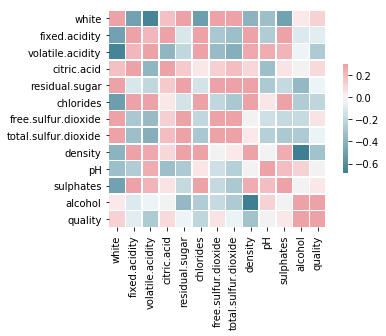

In [7]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)

sb.heatmap(wine.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
# Note that we won't have the formula option with sklearn
wine_X = wine.drop(['free.sulfur.dioxide', 'density', 'quality', 'color', 'white', 'good'], axis=1)
wine_y = wine['good']

### Standardize

In [9]:
from sklearn.preprocessing import scale

wine_X = scale(wine_X)

### Create Data Partition

In [10]:
from sklearn.model_selection import train_test_split

wine_train, wine_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=.2, random_state=1234)
wine_train

array([[-1.32319841, -1.09137315, -0.6787934 , ...,  0.13372214,
        -1.15103964, -0.91546416],
       [-0.55179227, -0.54467214,  0.90406569, ..., -0.11507303,
        -0.00852369, -1.16701119],
       [-0.24322981, -0.6054167 ,  0.35350601, ..., -0.17727182,
        -1.28545329,  1.60000607],
       ..., 
       [ 0.21961388,  1.76362102, -0.33469359, ...,  0.25811972,
         0.32751041, -0.58006813],
       [-0.08894858, -0.1802048 , -0.12823371, ..., -1.73224161,
         7.31701977, -0.83161516],
       [-0.01180796, -1.21286227,  0.21586609, ...,  1.50209555,
        -0.94941918, -0.49621913]])

## Regularized Regression

For this we'll use LogisticRegression from sklearn.  A key difference from the R elasticnet version is that it does lasso *or* ridge style penalty, and by default the latter.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [12]:
regreg_opts = {'C': np.logspace(-4, 1, 50)}
regreg_estimator = GridSearchCV(logreg, cv=10, param_grid=regreg_opts)
results_regreg = regreg_estimator.fit(wine_train, y_train)

In [13]:
results_regreg

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         4.2919...    3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Results

Get training prediction and plot over the values of C.

In [14]:
results_regreg.best_score_

0.73426977102174329

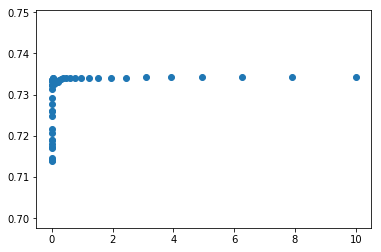

In [15]:
import matplotlib.pyplot as plt

plt.scatter(results_regreg.cv_results_['param_C'],
            results_regreg.cv_results_['mean_test_score'])
plt.show()


Examine the best value of C.

In [16]:
results_regreg.best_params_

{'C': 3.088843596477485}

### Prediction on Test Set

In [17]:
import sklearn.metrics as metrics

regreg_predict = results_regreg.predict(wine_test)

# create confusion matrix, and accuracy
cm = metrics.confusion_matrix(y_test, regreg_predict)
cm_prob = cm / np.sum(cm)  # as probs
print(cm_prob)

[[ 0.21769231  0.14      ]
 [ 0.09769231  0.54461538]]


In [18]:
acc = metrics.accuracy_score(y_test, regreg_predict)
acc = pd.DataFrame(np.array([acc]), columns=['Accuracy'])
acc

,Accuracy
0,0.762308


In [19]:
results_regreg.score(wine_test, y_test)

0.76230769230769235

In the following, to compare with the document, recall of the positive class is also known as 'sensitivity', while recall of the negative class is 'specificity'.  Likelise precision goes with positive/negative predictive value.  F1 is the harmonic mean of the two.

In [20]:
print(metrics.classification_report(y_test, regreg_predict))

             precision    recall  f1-score   support

        Bad       0.69      0.61      0.65       465
       Good       0.80      0.85      0.82       835

avg / total       0.76      0.76      0.76      1300



## k-Nearest Neighbors

Not much different from the R implementation in the document.

In [21]:
grid = [np.arange(3,11,2).tolist(), [25, 51, 101]]
grid = sum(grid, [])


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_opts = {'n_neighbors':  grid}
knn_estimator = GridSearchCV(knn, cv=10, param_grid=knn_opts)
results_knn = knn_estimator.fit(wine_train, y_train)

### Results

In [23]:
results_knn.best_score_

0.75428131614392924

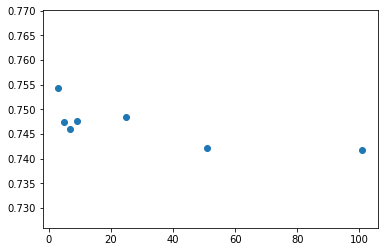

In [24]:
plt.scatter(results_knn.cv_results_['param_n_neighbors'],
            results_knn.cv_results_['mean_test_score'])
plt.show()

In [25]:
results_knn.best_params_

{'n_neighbors': 3}

### Prediction on Test Set

In [26]:
knn_predict = results_knn.predict(wine_test)

# create confusion matrix, and accuracy
cm = metrics.confusion_matrix(y_test,knn_predict)
cm_prob = cm / np.sum(cm)  # as probs
print(cm_prob)

[[ 0.23076923  0.12692308]
 [ 0.12384615  0.51846154]]


In [27]:
acc = metrics.accuracy_score(y_test, knn_predict)
acc = pd.DataFrame(np.array([acc]), columns=['Accuracy'])
acc

,Accuracy
0,0.749231


In [28]:
print(metrics.classification_report(y_test, knn_predict))

             precision    recall  f1-score   support

        Bad       0.65      0.65      0.65       465
       Good       0.80      0.81      0.81       835

avg / total       0.75      0.75      0.75      1300



## Neural Net

For the following, we set things up so they are similar to that in the document, which uses the nnet under the hood.  As with that demonstration, I would not recommend these settings in practice, as `MLPClassifier` has an adaptive learning rate and can do multiple layers also.  Unfortunately, it appears `n_jobs` is ignored here so this could take a long time.

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
nn = MLPClassifier(activation='logistic', learning_rate='constant')
nn_opts = {
    'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
    'alpha': np.linspace(.0001, 1, 10) 
}

nn_estimator = GridSearchCV(nn, cv=10, param_grid=nn_opts)

In [31]:
results_nn = nn_estimator.fit(wine_train, y_train)

### Results

In [32]:
results_nn.best_score_

0.73638637675582064

In [33]:
np.arange(3,40, 4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39])

In [34]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(plot_width=400, plot_height=400)

colors = ['darkred', 'dodgerblue', 'orangered', 'green']#*10

grid_par = results_nn.cv_results_['param_alpha']
grid_res = results_nn.cv_results_['mean_test_score']


# add a line renderer
p.scatter(results_nn.cv_results_['param_alpha'],
            results_nn.cv_results_['mean_test_score'])


p.multi_line([grid_par[np.arange(0,40, 4)],
              grid_par[np.arange(1,40, 4)],
              grid_par[np.arange(2,40, 4)],
              grid_par[np.arange(3,40, 4)]],
             [grid_res[np.arange(0,40, 4)],
              grid_res[np.arange(1,40, 4)],
              grid_res[np.arange(2,40, 4)],
              grid_res[np.arange(3,40, 4)],],
      line_color=colors)

show(p)

Loading BokehJS ...

In [35]:
results_nn.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (7,)}

### Prediction on Test Set

In [36]:
nn_predict = results_nn.predict(wine_test)

# create confusion matrix, and accuracy
cm = metrics.confusion_matrix(y_test,nn_predict)
cm_prob = cm / np.sum(cm)  # as probs
print(cm_prob)

[[ 0.23        0.12769231]
 [ 0.10923077  0.53307692]]


In [37]:
acc = metrics.accuracy_score(y_test, nn_predict)
acc = pd.DataFrame(np.array([acc]), columns=['Accuracy'])
acc

,Accuracy
0,0.763077


In [38]:
print(metrics.classification_report(y_test, nn_predict))

             precision    recall  f1-score   support

        Bad       0.68      0.64      0.66       465
       Good       0.81      0.83      0.82       835

avg / total       0.76      0.76      0.76      1300



## Random Forest

The random forest implementation for scikit-learn won't be too much different. The corresponding `mtry` from `randomForest` in R is `max_features`. Note that this model is run in parallel to speed things up (`n_jobs=4`).

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)

rf_opts = {'max_features': np.arange(2,7)}
rf_estimator = GridSearchCV(rf, cv=10, param_grid=rf_opts, n_jobs=4)
results_rf = rf_estimator.fit(wine_train, y_train)

### Results

In [40]:
results_rf.best_score_

0.82297479314989419

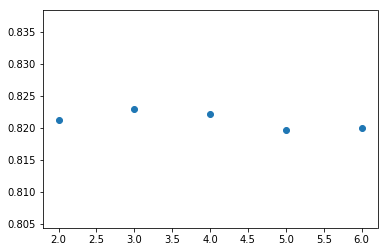

In [41]:
plt.scatter(results_rf.cv_results_['param_max_features'],
            results_rf.cv_results_['mean_test_score'])
plt.show()

In [42]:
results_rf.best_params_

{'max_features': 3}

### Prediction on Test Set

In [43]:
rf_predict = results_rf.predict(wine_test)

# create confusion matrix, and accuracy
cm = metrics.confusion_matrix(y_test,rf_predict)
cm_prob = cm / np.sum(cm)  # as probs
print(cm_prob)

[[ 0.26615385  0.09153846]
 [ 0.07846154  0.56384615]]


In [44]:
acc = metrics.accuracy_score(y_test, rf_predict)
acc = pd.DataFrame(np.array([acc]), columns=['Accuracy'])
acc

,Accuracy
0,0.83


In [45]:
print(metrics.classification_report(y_test, rf_predict))

             precision    recall  f1-score   support

        Bad       0.77      0.74      0.76       465
       Good       0.86      0.88      0.87       835

avg / total       0.83      0.83      0.83      1300



## Support Vector Machines

As with some of the others, this implementation is fairly similar to the one used in the R code. `C` is our penalty parameter.

In [46]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm_opts = {'C': [.25, .5, 1, 2, 4]}
svm_estimator = GridSearchCV(svm, cv=10, param_grid=svm_opts)
results_svm = svm_estimator.fit(wine_train, y_train)

### Results

In [47]:
results_svm.best_score_

0.73638637675582064

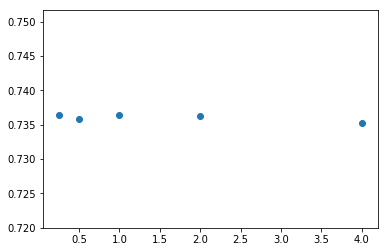

In [48]:
plt.scatter(results_svm.cv_results_['param_C'],
            results_svm.cv_results_['mean_test_score'])
plt.show()

In [49]:
results_svm.best_params_

{'C': 0.25}

### Prediction on Test Set

In [50]:
svm_predict = results_svm.predict(wine_test)

# create confusion matrix, and accuracy
cm = metrics.confusion_matrix(y_test,svm_predict)
cm_prob = cm / np.sum(cm)  # as probs
print(cm_prob)

[[ 0.21538462  0.14230769]
 [ 0.09384615  0.54846154]]


In [51]:
acc = metrics.accuracy_score(y_test, svm_predict)
acc = pd.DataFrame(np.array([acc]), columns=['Accuracy'])
acc

,Accuracy
0,0.763846


In [52]:
print(metrics.classification_report(y_test, svm_predict))

             precision    recall  f1-score   support

        Bad       0.70      0.60      0.65       465
       Good       0.79      0.85      0.82       835

avg / total       0.76      0.76      0.76      1300

